# D210 Representation and Reporting

## Jan Francis Mitchell Barlaan

### A1: Interactive Data Dashboard
* The process used to create this dashboard entailed combining the Churn dataset provided by WGU with the Telecom dataset that I obtained from Kaggle. 

* The Tableau Public dashboard can be accessed at the following link: https://public.tableau.com/app/profile/jan.francis.mitchell.barlaan/viz/D210RepresentationandReportingPAWorkbook/WGUMSDAD210RepresentationandReporting

### A2: Data Sets 

* The following links were used to access both csv files used in the creation of this dashboard
  
  Churn-https://access.wgu.edu/ASP3/aap/content/f9tjr8djg83jd8c3sdf8.zip 
  
  Competitor Dataset-https://www.kaggle.com/datasets/barun2104/telecom-churn

### Data Preparation and Cleaning

* The following steps show the code used to clean and prepare both datasets involved in creating the Tableau Dashboard

In [1]:
#Prepare WGU Churn dataset

#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# Disabling warnings
import warnings
warnings.filterwarnings('ignore')


#Load CSV
# The first column is an index. We will duplicate this and create a column without it
df = pd.read_csv(r'C:\Users\neoka\OneDrive\Desktop\WGU MSDA Course Material\D210\Churn/churn_clean.csv', index_col=0)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_id           10000 non-null  object 
 1   Interaction           10000 non-null  object 
 2   UID                   10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  TimeZone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              10000 non-null  int64  
 14  Age                   10000 non-null  int64  
 15  Income             

In [3]:
df.head()

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,
1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,...,172.455519,904.536110,5,5,5,3,4,4,3,4
2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,...,242.632554,800.982766,3,4,3,3,4,3,4,4
3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [4]:
#Check for duplicates

df.duplicated()

CaseOrder
1        False
2        False
3        False
4        False
5        False
         ...  
9996     False
9997     False
9998     False
9999     False
10000    False
Length: 10000, dtype: bool

In [5]:
#Show number of duplicates. False = no duplicates 

print(df.duplicated().value_counts())

False    10000
dtype: int64


In [6]:
#Count of null/missing values in each column

df.isnull().sum()

Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMethod           0
Tenure      

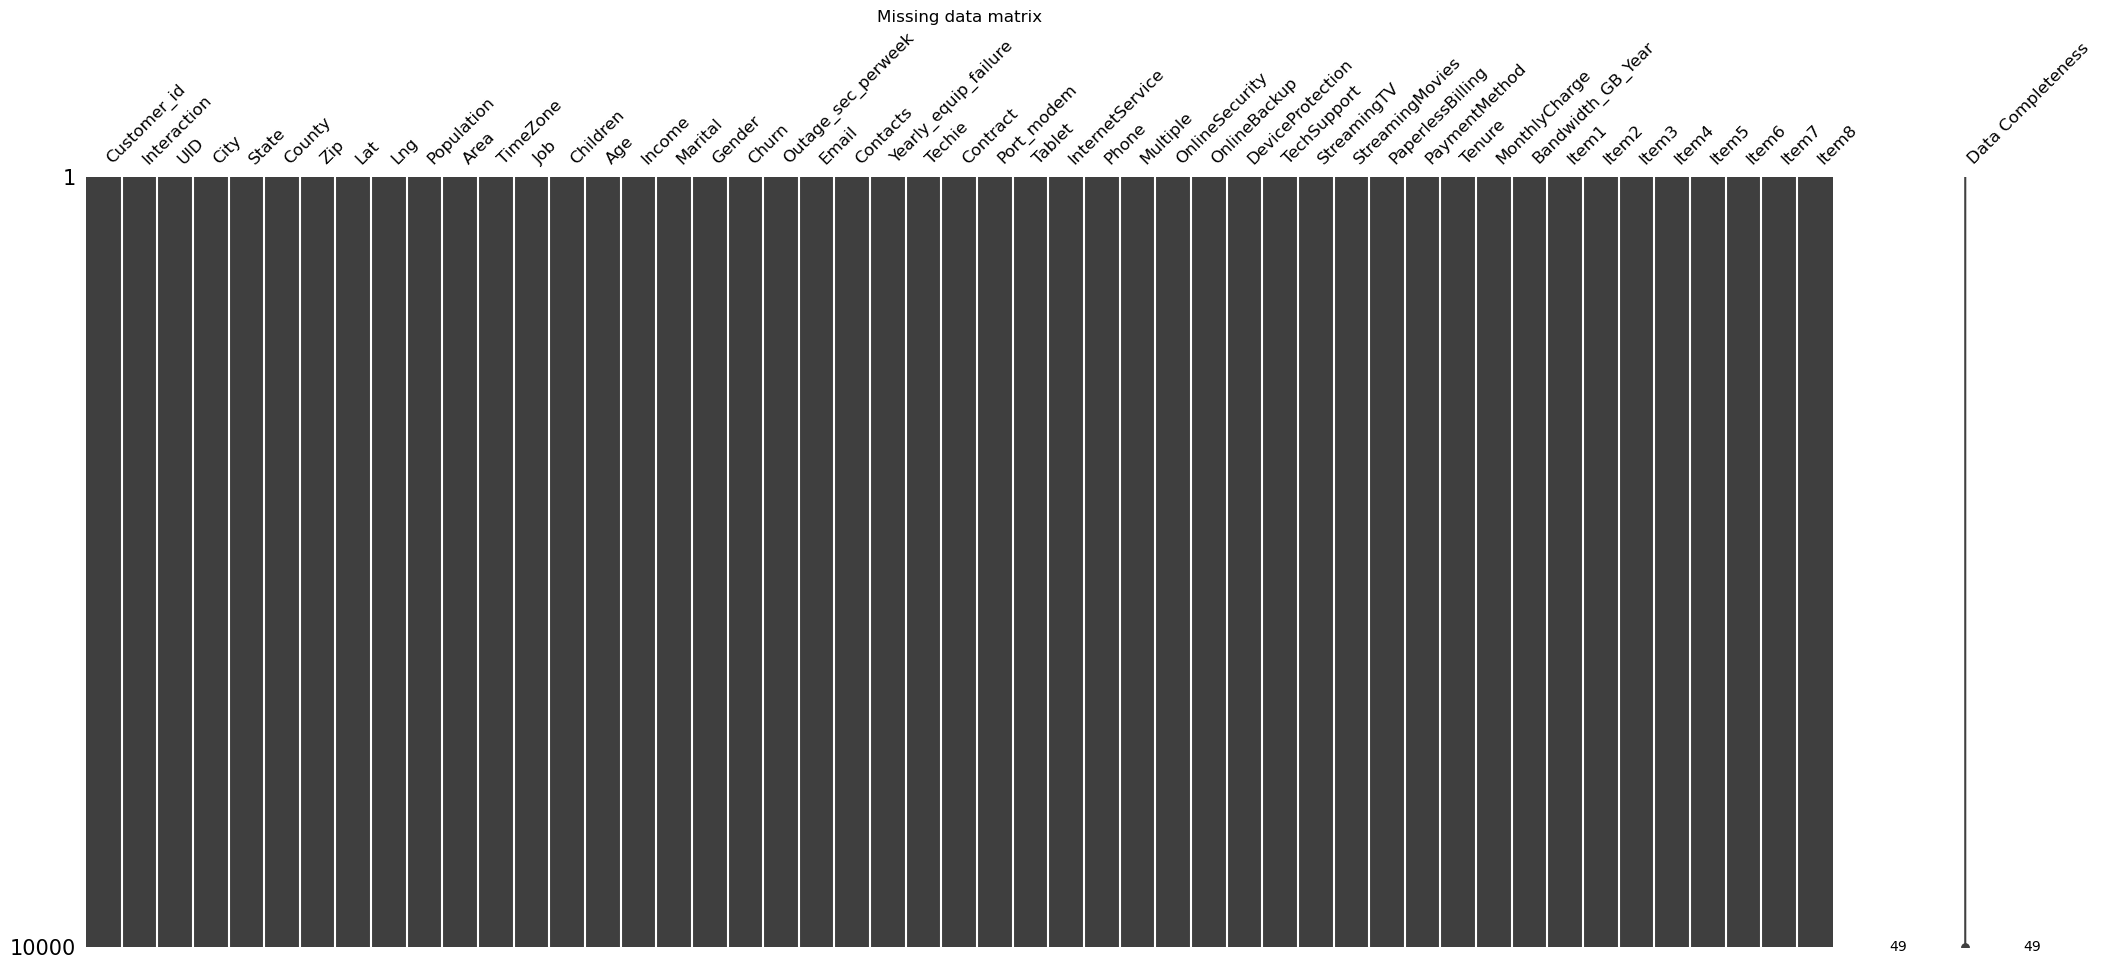

In [7]:
#Import missingno to visualize missing/null values 

import missingno as msno
msno.matrix(df, fontsize=12, labels=True)
plt.title('Missing data matrix')
plt.show()


In [8]:
#Round Tenure and MonthlyCharge to the nearest integer

df['Account_Age'] = df['Tenure'].round()

df['Monthly_Charge'] = df['MonthlyCharge'].round()


#Rename Bandwidth_GB_Year
df['Data_Usage'] = df['Bandwidth_GB_Year'].round()

#Rename Contacts
df['Customer_Service_Calls'] = df['Contacts']

#Rename InternetService
df['Internet_Service'] = df['InternetService']


In [9]:
#Convert Internet_Service column variables to yes/no 

internet_service_mapping = { 'DSL' : 'Yes', 'Fiber Optic' : 'Yes', 'None' : 'No' }

df['Internet_Service'] = df['Internet_Service'].map(internet_service_mapping)


In [10]:
#Add label column to WGU Churn dataset 

df['Source'] = 'WGU Telecom Co.'

In [11]:
#Create new dataframe from WGU Churn dataset containing only the relevant columns for this analysis

WGU_df = df[['Churn', 'Account_Age', 'Internet_Service', 'Data_Usage', 'Customer_Service_Calls', 'MonthlyCharge', 'Source']]

WGU_df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Churn                   10000 non-null  object 
 1   Account_Age             10000 non-null  float64
 2   Internet_Service        10000 non-null  object 
 3   Data_Usage              10000 non-null  float64
 4   Customer_Service_Calls  10000 non-null  int64  
 5   MonthlyCharge           10000 non-null  float64
 6   Source                  10000 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 625.0+ KB


In [12]:
WGU_df.head()

,Churn,Account_Age,Internet_Service,Data_Usage,Customer_Service_Calls,MonthlyCharge,Source
CaseOrder,,,,,,,
1,No,7.0,Yes,905.0,0,172.455519,WGU Telecom Co.
2,Yes,1.0,Yes,801.0,0,242.632554,WGU Telecom Co.
3,No,16.0,Yes,2055.0,0,159.947583,WGU Telecom Co.
4,No,17.0,Yes,2165.0,2,119.956840,WGU Telecom Co.
5,Yes,2.0,Yes,271.0,2,149.948316,WGU Telecom Co.


In [13]:
# Save prepared WGU dataframe to CSV

WGU_df.to_csv('WGU_Prepared_Churn.csv', index=False)

In [14]:
#Prepare Kaggle Telecom dataset

#Load Kaggle Telecom CSV 
Kaggle_df = pd.read_csv(r'C:\Users\neoka\OneDrive\Desktop\WGU MSDA Course Material\D210\Churn\Kaggle Customer Churn/telecom_churn.csv')

df.set_index('Churn', inplace=True)

Kaggle_df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [15]:
Kaggle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [16]:
#Check for duplicates

Kaggle_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3328    False
3329    False
3330    False
3331    False
3332    False
Length: 3333, dtype: bool

In [17]:
#Show number of duplicates. False = no duplicates 

print(Kaggle_df.duplicated().value_counts())

False    3333
dtype: int64


In [18]:
#Count of null/missing values in each column

Kaggle_df.isnull().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [19]:
#Convert AccountWeeks values to Account_Age in months

Kaggle_df['Account_Age'] = Kaggle_df['AccountWeeks']*0.230137
Kaggle_df['Account_Age'] = Kaggle_df['Account_Age'].round()

In [20]:
#Convert columns with boolean values into string

string_mapping = { 1 : 'Yes', 0 : 'No' }

Kaggle_df['Churn'] = Kaggle_df['Churn'].map(string_mapping)
Kaggle_df['Internet_Service'] = Kaggle_df['DataPlan'].map(string_mapping)

In [21]:
#Rename DataUsage
Kaggle_df['DataUsage'] = Kaggle_df['DataUsage']*12
Kaggle_df['Data_Usage'] = Kaggle_df['DataUsage'].round()

#Rename CustServCalls
Kaggle_df['Customer_Service_Calls'] = Kaggle_df['CustServCalls']

#Rename MonthlyCharge
Kaggle_df['Monthly_Charge'] = Kaggle_df['MonthlyCharge']

In [22]:
#Add label column to Kaggle Telecom dataset 

Kaggle_df['Source'] = 'Kaggle Competitor'

In [23]:
Kaggle_df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Account_Age,Internet_Service,Data_Usage,Customer_Service_Calls,Monthly_Charge,Source
0,No,128,1,1,32.4,1,265.1,110,89.0,9.87,10.0,29.0,Yes,32.0,1,89.0,Kaggle Competitor
1,No,107,1,1,44.4,1,161.6,123,82.0,9.78,13.7,25.0,Yes,44.0,1,82.0,Kaggle Competitor
2,No,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2,32.0,No,0.0,0,52.0,Kaggle Competitor
3,No,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6,19.0,No,0.0,2,57.0,Kaggle Competitor
4,No,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1,17.0,No,0.0,3,41.0,Kaggle Competitor


In [24]:
#Create new dataframe from Kaggle Telecom dataset containing only the relevant columns for this analysis

Kaggle_df = Kaggle_df[['Churn', 'Internet_Service', 'Data_Usage', 'Customer_Service_Calls', 'MonthlyCharge', 'Account_Age', 'Source']]

Kaggle_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Churn                   3333 non-null   object 
 1   Internet_Service        3333 non-null   object 
 2   Data_Usage              3333 non-null   float64
 3   Customer_Service_Calls  3333 non-null   int64  
 4   MonthlyCharge           3333 non-null   float64
 5   Account_Age             3333 non-null   float64
 6   Source                  3333 non-null   object 
dtypes: float64(3), int64(1), object(3)
memory usage: 182.4+ KB


In [25]:
Kaggle_df.head()


,Churn,Internet_Service,Data_Usage,Customer_Service_Calls,MonthlyCharge,Account_Age,Source
0,No,Yes,32.0,1,89.0,29.0,Kaggle Competitor
1,No,Yes,44.0,1,82.0,25.0,Kaggle Competitor
2,No,No,0.0,0,52.0,32.0,Kaggle Competitor
3,No,No,0.0,2,57.0,19.0,Kaggle Competitor
4,No,No,0.0,3,41.0,17.0,Kaggle Competitor


In [26]:
# Save prepared Kaggle dataframe to CSV

Kaggle_df.to_csv('Kaggle_Prepared_Churn.csv', index=False)

In [27]:
#Combine both WGU and Kaggle prepared datasets

Combined_Churn_df = pd.concat([WGU_df, Kaggle_df], ignore_index=True)
Combined_Churn_df



,Churn,Account_Age,Internet_Service,Data_Usage,Customer_Service_Calls,MonthlyCharge,Source
0,No,7.0,Yes,905.0,0,172.455519,WGU Telecom Co.
1,Yes,1.0,Yes,801.0,0,242.632554,WGU Telecom Co.
2,No,16.0,Yes,2055.0,0,159.947583,WGU Telecom Co.
3,No,17.0,Yes,2165.0,2,119.956840,WGU Telecom Co.
4,Yes,2.0,Yes,271.0,2,149.948316,WGU Telecom Co.
...,...,...,...,...,...,...,...
13328,No,44.0,Yes,32.0,2,71.700000,Kaggle Competitor
13329,No,16.0,No,4.0,3,56.400000,Kaggle Competitor
13330,No,6.0,No,0.0,2,56.000000,Kaggle Competitor
13331,No,42.0,No,0.0,2,50.000000,Kaggle Competitor


In [28]:
#Save Combined Churn dataset to csv
Combined_Churn_df.to_csv('Combined_Prepared_Churn.csv', index=False)

### A3: Installation Instructions

* The hyperlink listed below is an alternative option to directly opening the dashboard via Tableau Public: 

https://public.tableau.com/app/profile/jan.francis.mitchell.barlaan/viz/D210RepresentationandReportingPAWorkbook/WGUMSDAD210RepresentationandReporting

* The following steps can also be used to install the dashboard via the Tableau workbook file I have provided. 

1) Double-click and open Tableau Desktop on your local machine
2) Navigate to the top-left corner where it says 'File' and click on it. A dropdown will appear
3) Navigate to the second option labeled 'Open' and click on it,
4) A box will appear, asking you to locate the file to be opened. Make sure you save the 'D210 Representation and Reporting PA Workbook' file in your Desktop for the easiest access and navigation experience.
5) Once you have located that file, click on it to select, and finally click the open button within the prompt (this is located on the lower-right hand side of that box)'
6) Once the Tableau workbook file has opened, navigate to the bottom and click on the right-most tab labeled 'WGU MSDA D210 Representation and Reporting'
7) This tab is the exact same story/dashboard that is published via the Tableau Public link I have provided earlier.

* I recommend using the provided Tableau Public link over the local dashboard loading for ease of use and universal access. However, both will provide the exact same story/dashboard.

### A4: Navigation Instructions

* If you chose to load the dashboard locally on your desktop, navigate to the far right and click on the Story tab that's labeled 'WGU MSDA D210 Representation and Reporting'. 
* If you decided to go the Tableau Public webpage option, by default the page loaded should be the story itself.

* Within the story there are 4 tabs which are labeled Introduction, Customer Metrics, Churn and Subscription, and Recommendations and Insights

* Introduction: This is simply a title page.

* Customer Metrics: These represent metrics such as customer counts and breakdowns by provider, average account age, data usage, and the amount of customer service calls. 

* Churn and Subscription : This tab contains two KPIs with filter functions. Each visual has a filter for service Provider/Source and enables the user to isolate each individual provider statistics or view the averages for Monthly Charges based on internet service and average age for account churning.

* Recomendations and Insights: This tab has a summary of insights gleaned from the data and also mentions tips/caveats regarding any possible limitations with the data. 

### B: Panopto Storytelling with Data

* My Panopto submission can be found at the following link:

https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=9c0ad9c1-270d-4049-a3b4-b280000fec0d

### C1: Dashboard Alignment
* The purpose of the dashboards I have created were to present comparison data of our telecom company vs another competing telecom company to our stakeholders. In this case, our stakeholders would be senior management and the company executives. The dashboards were created by using a dataset that also had a churn variable and other common/shared variables such as data usage and account age. Certain columns from both datasets had to be either dropped or renamed in order to successfully join the datasets with the pandas concatenate function. 

### C2: Additional Data Set Insights
* Some of the variables contained in the external/Kaggle datasets contained columns that were similar to the WGU telecom data but in a slightly different numerical form and/or name. Slight calculations were performed and column renaming was performed to prepare it for successful joining with the WGU dataset. One thing to note is that the WGU dataset has 10,000 observations while the Kaggle/external dataset only has 3,333 in comparison. Ideally, I think it would be better if we had datasets with as close to a 1:1 ratio to each other in the amount of observations. However, skewed comparison numbers like these can be more accurate to real-life scenarios when making comparisons between competing company data. 

### C3: Decision-Making Support
* Two useful visuals are Average Account Age pie chart and the Data usage bar chart withen the Customer Metrics dashboard. The former can provide a metric of their oldest clients to possibly compare to the average age of accounts that churn. The latter is useful in seeing the frequency of tiers of data consumption in order to possibly help tailor bandwidth-specific data packages.

### C4: Interactive Controls
* The two interactive controls that are present in the 'Churn and Subscription' dashboard are tied to different charts. However, they both filter for the source/service provider. One does it in the context of Average Monthly Charge based on whether a customer is subscribed to internet service or not. The other has the filter applied in the context of Churn status by average account age.  

### C5: Colorblindness
* In the effort to be mindful of those who are visually impaired/colorblind, I chose a palette that uses blue and orange as contrasting values in most of the visuals and red and dark grey in one other graph so that obvious distinctions can be made.

### C6: Data Representations
* An insight I wanted to present to the viewers is that although the WGU telecom provider set has almost 3 times as many customers as the competing provider, the average monthly cost for their customers with an internet service subscription is significantly more expensive at 177.94 vs 75.89 at the competitor. Another key insight is the fact that the average account age for the competitor is about 10 months older than the average account age for those that churn with the WGU telecom company (23 vs 13 months, respectively). This would lead me to believe that although the competitor is smaller and is charging cheaper prices for their services, they can somehow retain their customers for a longer period of time at an average of 23 months before they eventually churn. Additional insights could be made as to whether the customer was satisfied with the cost to service performance provided if the competitor dataset included survey data. Unfortunately, this was not present in this dataset.

### C7: Audience Analysis
* The target audience in this analysis is senior management, leading me to keep my charts simple and concise since their time is short and valuable. Also, being concise lets them know which potential metrics to target and improve such as average customer data usage and account age in order to help custom tailor service packages that might ultimately reduce churn.

### C8: Universal Access 

* Providing this story/dashboard as a webpage via Tableau Public allows for easy access and provides a way for the audience to interact with the visuals in their own time. Additionally, they can follow along the Panopto presentation while having the dashboard open in order to gain a better understanding of the topics discussed. I also chose colorblind friendly color palettes so that anyone and everyone can view the same color gradients regardless of any potential impairments. 

### C9: Effective Storytelling
* According to this Medium article by Maxime Haegeman, elements of a good data story include the following: characters, plot, environment, conflict, and resolution (Haegeman, 2023). All of these elements were easily visualized and made interactive through Tableau's features. Due to the specifications in the rubric requirement, I will only describe and explain two of these listed elements: the plot and the conflict.


* The plot pertains to telecom customer churn trends and distributions as described by the interactive dashboards with customizable histogram filters present in the second dashboard in Tableau public (Churn and Subscription). This allowed the audience to isolate each telecom provider at their leisure through direct interaction with the histogram. Arguably, we could also consider the Customer Metrics dashboard as a supplement since it provides more context to the plot, albeit, the visuals are static and non-interactive. 


* The conflict is represented by the differences in average monthly charge and account age of churners
and non-churners. This element is also covered by the Churn and Subscription dashboard.


### D: Sources

* Haegeman, M. (2023, February 21). The art of storytelling in data science: How to communicate findings effectively. Medium. https://medium.com/@maximehaegeman/the-art-of-storytelling-in-data-science-how-to-communicate-findings-effectively-749a1d76cb0c 


* Kumar, B. (2020, March 23). Customer churn. Kaggle. https://www.kaggle.com/datasets/barun2104/telecom-churn 




